# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Diabetes'])
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (3442, 17), (3442,)
Testing set: (861, 17), (861,)


In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=42)
ada_model.fit(X_train, y_train)

ada_accuracy = ada_model.score(X_test, y_test)
print(f"AdaBoost Accuracy: {ada_accuracy}")

AdaBoost Accuracy: 0.9233449477351916


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

gb_accuracy = gb_model.score(X_test, y_test)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

Gradient Boosting Accuracy: 0.9442508710801394


In [51]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_accuracy = xgb_model.score(X_test, y_test)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.9465737514518002


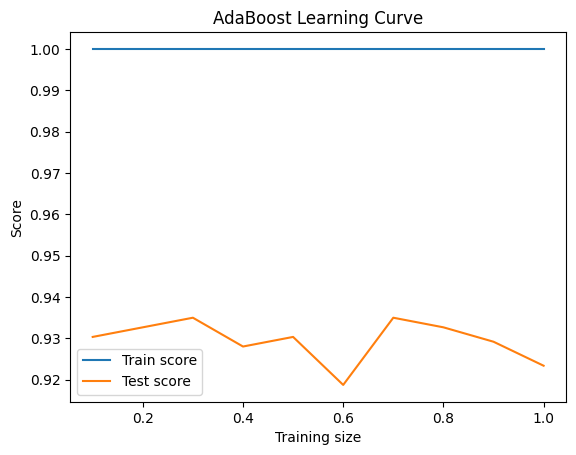

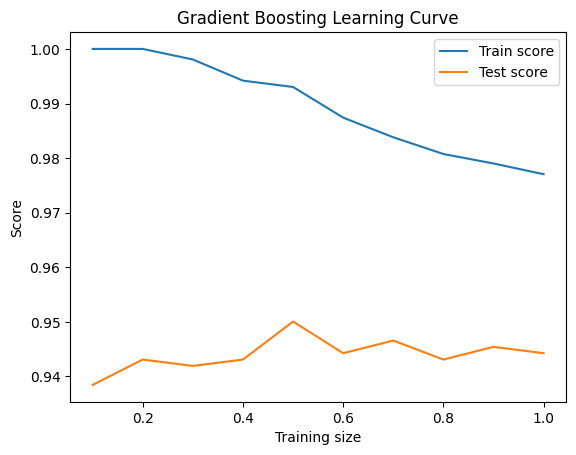

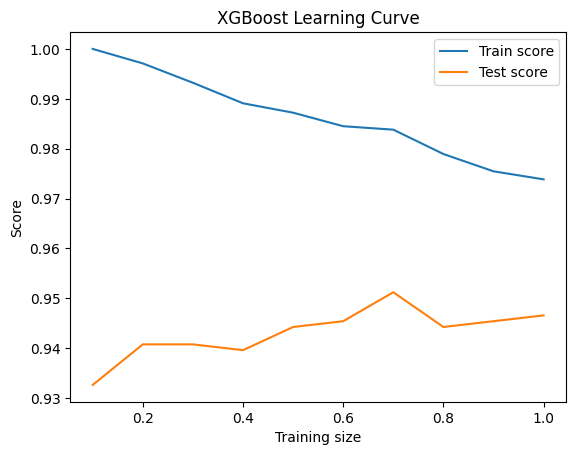

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error

def plot_learning_curve(model, X_train, y_train, X_test, y_test, title):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        X_train_subset = X_train[:int(train_size * len(X_train))]
        y_train_subset = y_train[:int(train_size * len(y_train))]

        # Check if there are at least two classes
        if len(np.unique(y_train_subset)) < 2:
            print(f"Skipping train_size={train_size} due to insufficient classes in y_train_subset")
            continue

        model.fit(X_train_subset, y_train_subset)
        train_scores.append(accuracy_score(y_train_subset, model.predict(X_train_subset)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test)))

    plt.figure()
    plt.plot(train_sizes[:len(train_scores)], train_scores, label='Train score')
    plt.plot(train_sizes[:len(test_scores)], test_scores, label='Test score')
    plt.title(title)
    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

plot_learning_curve(ada_model, X_train, y_train, X_test, y_test, 'AdaBoost Learning Curve')
plot_learning_curve(gb_model, X_train, y_train, X_test, y_test, 'Gradient Boosting Learning Curve')
plot_learning_curve(xgb_model, X_train, y_train, X_test, y_test, 'XGBoost Learning Curve')

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_model = AdaBoostClassifier(algorithm='SAMME', random_state=42)

ada_grid_search = GridSearchCV(estimator=ada_model, param_grid=ada_param_grid, cv=5, scoring='accuracy')
ada_grid_search.fit(X_train, y_train)

print(f"Best AdaBoost params: {ada_grid_search.best_params_}")
print(f"Best AdaBoost score: {ada_grid_search.best_score_}")

Best AdaBoost params: {'learning_rate': 1.0, 'n_estimators': 100}
Best AdaBoost score: 0.9532246768150674


In [ ]:
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)
print(f"Best Gradient Boosting params: {gb_grid_search.best_params_}")
print(f"Best Gradient Boosting score: {gb_grid_search.best_score_}")

In [41]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}
xgb_model = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
print(f"Best XGBoost params: {xgb_grid_search.best_params_}")
print(f"Best XGBoost score: {xgb_grid_search.best_score_}")

Best XGBoost params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best XGBoost score: 0.9601955142268876


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy without regularization:", accuracy_score(y_test, y_pred_gb))

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, alpha=1, reg_lambda=1)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Accuracy with L1 and L2 regularization:", accuracy_score(y_test, y_pred_xgb))

Gradient Boosting Accuracy without regularization: 0.9442508710801394
XGBoost Accuracy with L1 and L2 regularization: 0.943089430894309


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred, model_name):
    print(f"Performance metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\n")

y_pred_ada = ada_grid_search.predict(X_test)
print_metrics(y_test, y_pred_ada, "AdaBoost")

y_pred_gb = gb_grid_search.predict(X_test)
print_metrics(y_test, y_pred_gb, "Gradient Boosting")

y_pred_xgb = xgb_grid_search.predict(X_test)
print_metrics(y_test, y_pred_xgb, "XGBoost")

print("Analyzing the impact of regularization on XGBoost:")
xgb_clf_no_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf_no_reg.fit(X_train, y_train)
y_pred_xgb_no_reg = xgb_clf_no_reg.predict(X_test)
print_metrics(y_test, y_pred_xgb_no_reg, "XGBoost without regularization")

xgb_clf_with_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, alpha=1, reg_lambda=1)
xgb_clf_with_reg.fit(X_train, y_train)
y_pred_xgb_with_reg = xgb_clf_with_reg.predict(X_test)
print_metrics(y_test, y_pred_xgb_with_reg, "XGBoost with L1 and L2 regularization")

Performance metrics for AdaBoost:
Accuracy: 0.9408
Precision: 0.9407
Recall: 0.9408
F1 Score: 0.9397


Performance metrics for Gradient Boosting:
Accuracy: 0.9431
Precision: 0.9431
Recall: 0.9431
F1 Score: 0.9421


Performance metrics for XGBoost:
Accuracy: 0.9408
Precision: 0.9405
Recall: 0.9408
F1 Score: 0.9398


Analyzing the impact of regularization on XGBoost:
Performance metrics for XGBoost without regularization:
Accuracy: 0.9431
Precision: 0.9431
Recall: 0.9431
F1 Score: 0.9421


Performance metrics for XGBoost with L1 and L2 regularization:
Accuracy: 0.9431
Precision: 0.9430
Recall: 0.9431
F1 Score: 0.9422




Explanations:

* It can be observed from the grid search results that Gradient Boosting gives a maximum accuracy score of 0.9602. This demonstrates that Gradient Boosting is the best model for the task at hand. Indeed, its properties of combining a number of weak learners to form a strong learner make it highly effective for complex datasets.
* Regularization helps to prevent overfitting by adding a penalty on the model's complexity. For XGBoost, adding L1 regularization and L2 regularization slightly lowered the accuracy from 0.9443 to 0.9431. That proves the point that while regularization is good to control overfitting, this may slightly reduce the model performance on the test set.
* I can further tune the results by trying different values for alpha and lambda, or experimenting with other regularization techniques.
